# SHAP

Experiment with the [SHAP package](https://github.com/shap/shap). For more details, see original paper [A Unified Approach to Interpreting Model Predictions](https://arxiv.org/abs/1705.07874).

The examples in this notebook are taken from [here](https://shap.readthedocs.io/en/latest/overviews.html).

In [12]:
import numpy as np
import sklearn
import shap

## Explaining a linear regression model

In [4]:
# a classic housing price dataset
X, y = shap.datasets.california(n_points=1000)
X100 = shap.utils.sample(X, 100)  # 100 instances for use as the background distribution

X100.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
12953,3.7813,15.0,5.620058,1.013500,2868.0,2.765670,38.70,-121.28
18537,4.3000,20.0,6.270677,1.137845,981.0,2.458647,36.98,-122.00
13337,3.9107,27.0,5.572816,1.000000,321.0,3.116505,34.04,-117.68
12651,1.6521,36.0,4.068477,1.121606,2460.0,2.904368,38.52,-121.44
19986,2.3152,25.0,5.412844,1.055046,1424.0,3.266055,36.21,-119.32


In [5]:
# a simple linear model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

The most common way of understanding a linear model is to examine the coefficients learned for each feature. 

In [6]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(5))

Model coefficients:

MedInc = 0.42563
HouseAge = 0.01033
AveRooms = -0.1161
AveBedrms = 0.66385
Population = 3e-05
AveOccup = -0.26096
Latitude = -0.46734
Longitude = -0.46272


While coefficients are great for telling us what will happen when we change the value of an input feature, by themselves they are not a great way to measure the overall importance of a feature. This is because the value of each coefficient depends on the scale of the input features. If for example we were to measure the age of a home in minutes instead of years, then the coefficients for the HouseAge feature would become 0.0115 / (365∗24∗60) = 2.18e-8. Clearly the number of years since a house was built is not more important than the number of minutes, yet its coefficient value is much larger. This means that the magnitude of a coefficient is not necessarily a good measure of a feature’s importance in a linear model.

## A more complete picture using partial dependence plots

To understand a feature’s importance in a model, it is necessary to understand both how changing that feature impacts the model’s output, and also the distribution of that feature’s values. To visualize this for a linear model we can build a classical partial dependence plot and show the distribution of feature values as a histogram on the x-axis:

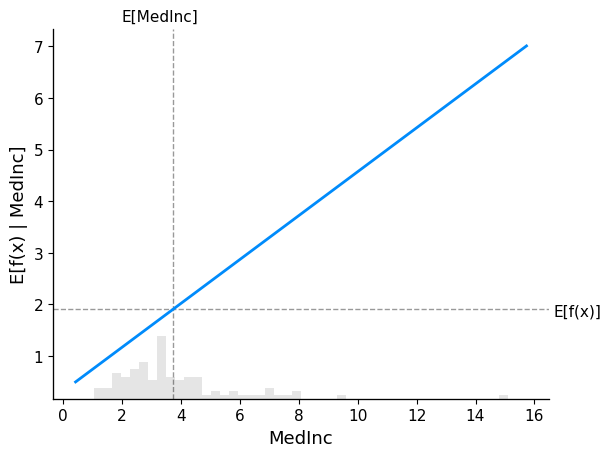

In [8]:
shap.partial_dependence_plot(
    "MedInc",
    model.predict,
    X100,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

In [31]:
# verify

tmp = X100.copy(deep=True)
for c in tmp.columns:
    if c == "MedInc":
        pass
    else:
        tmp[c] = [tmp[c].mean() for i in range(len(X100))]

print(f"mean value of 'MedInc' {np.mean(X100.MedInc) :.2f}")
print(f"mean model prediction for 'MedInc' (setting all other features to their mean value): {model.predict(tmp).mean() :.2f}")

mean value of 'MedInc' 3.73
mean model prediction for 'MedInc' (setting all other features to their mean value): 1.90
